# Analysing Data - Assignment 1 

## Part 1 

For the first exercise, I explored the NLTK-tool to analyse a couple of texts. The first task is stated as following:

> Perform sentence splitting and word tokenization. Report the statistics of word frequency (per story and in total) in a python dictionary, plot the 25 most common words (per story and in total) in the form of a histogram. 


Top 10 words in 01.txt: [('river', 11), ('missy', 10), ('maps', 5), ('sitting', 3), ('chair', 3), ('placing', 3), ('house', 2), ('map', 2), ('people', 2), ('looked', 2)]

Top 10 words in 02.txt: [('back', 6), ('wanted', 5), ('come', 4), ('smiled', 4), ('looked', 3), ('eyes', 3), ('look', 3), ('got', 3), ('loved', 3), ('day', 3)]

Top 10 words in 03.txt: [('rose', 25), ('doctor', 20), ('time', 15), ('one', 10), ('would', 10), ('energy', 8), ('vortex', 8), ('long', 8), ('hand', 8), ('much', 8)]

Top 10 words in 04.txt: [('doctor', 30), ('rose', 21), ('martha', 20), ('tardis', 9), ('could', 8), ('life', 6), ('time', 5), ('like', 5), ('translate', 5), ('way', 4)]

Top 10 words in 05.txt: [('doctor', 31), ('eyes', 15), ('could', 13), ('back', 13), ('yet', 12), ('like', 12), ('time', 12), ('would', 11), ('face', 10), ('shot', 10)]

Top 10 words in Total: [('doctor', 83), ('rose', 46), ('time', 32), ('could', 29), ('back', 27), ('like', 25), ('eyes', 24), ('would', 23), ('martha', 20), ('fac

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liseferinga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liseferinga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


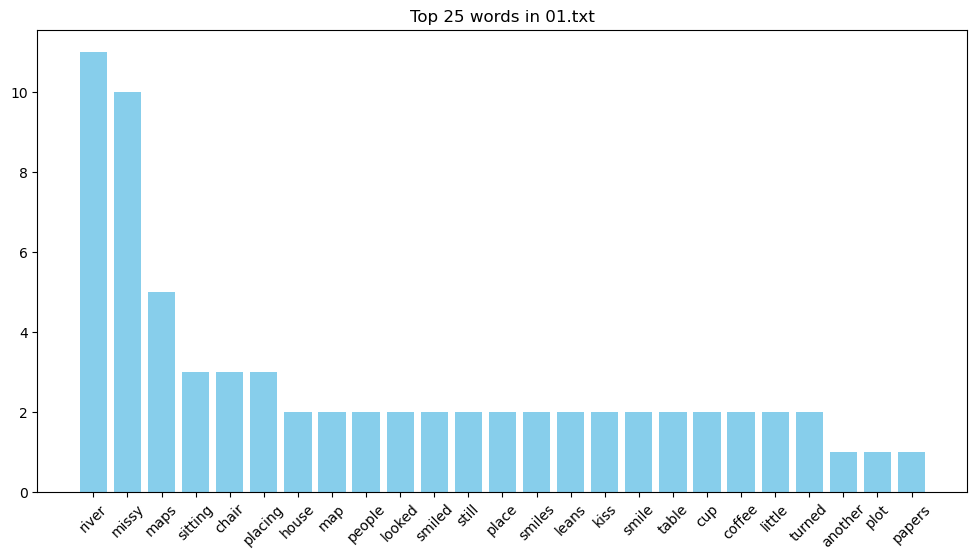

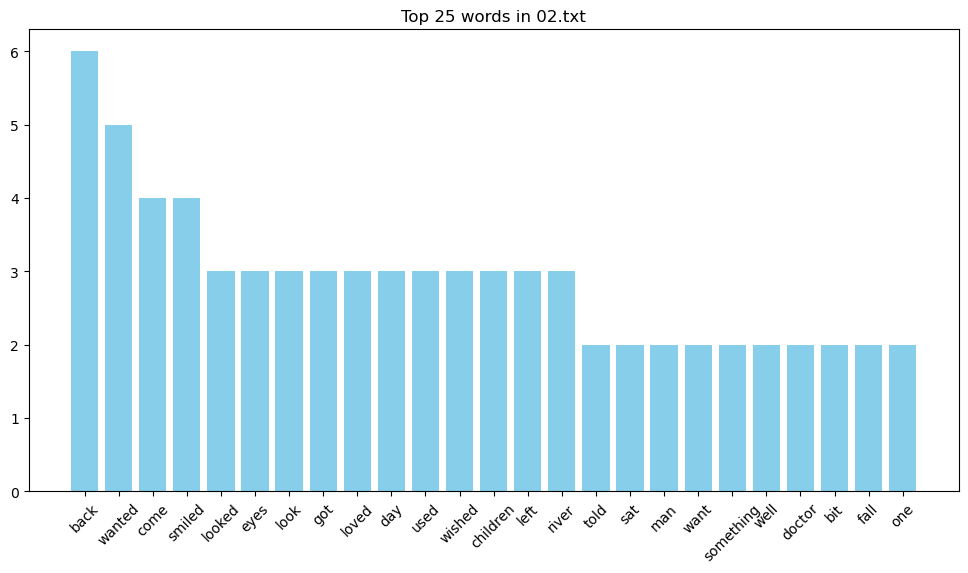

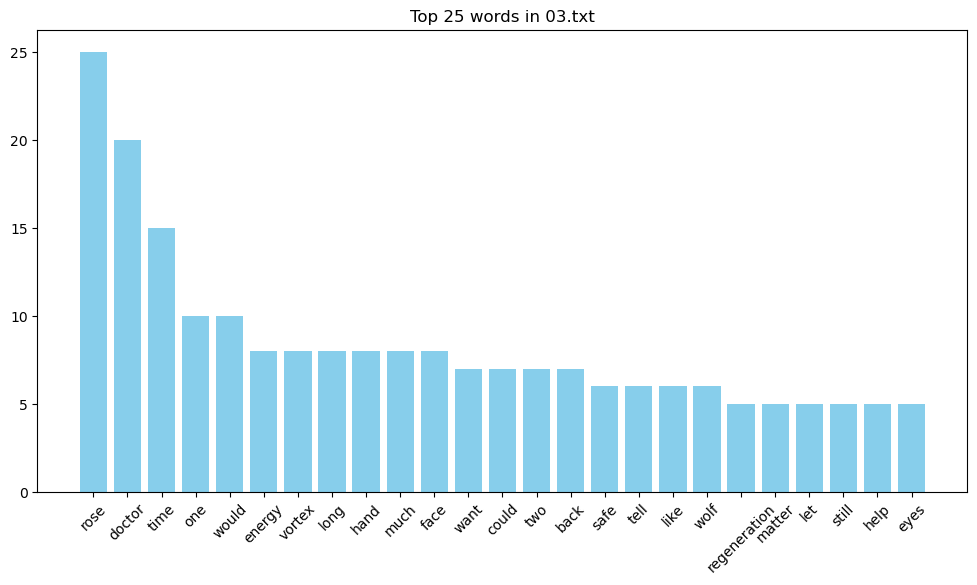

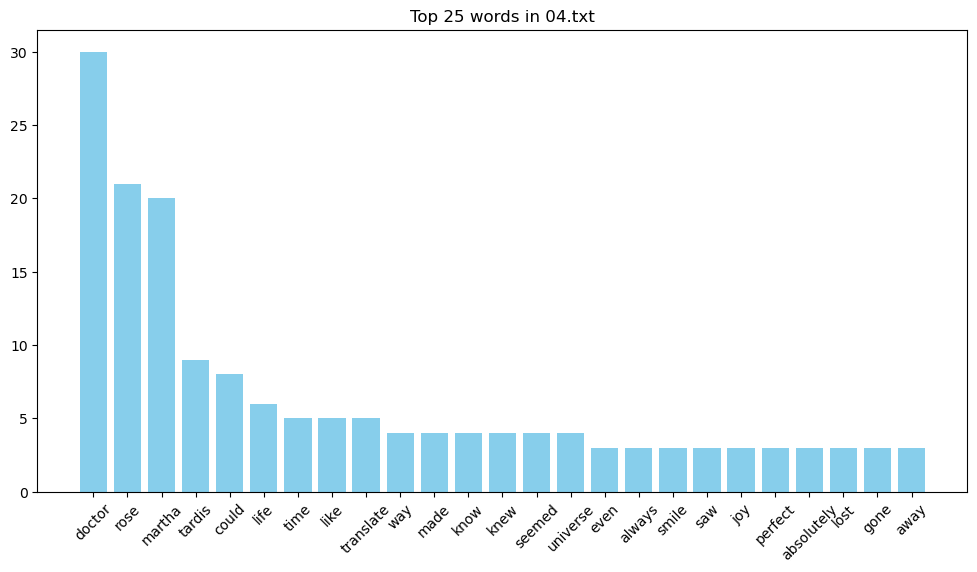

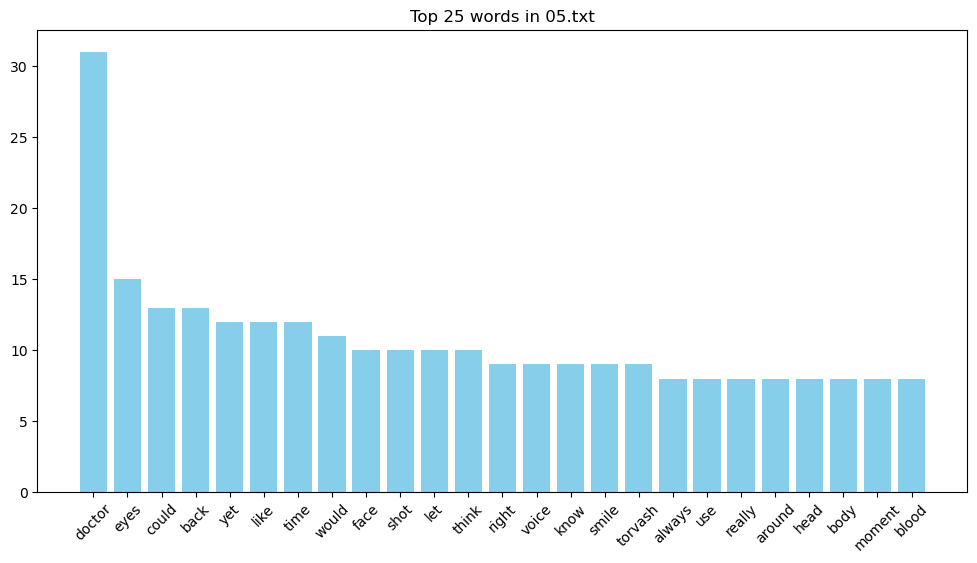

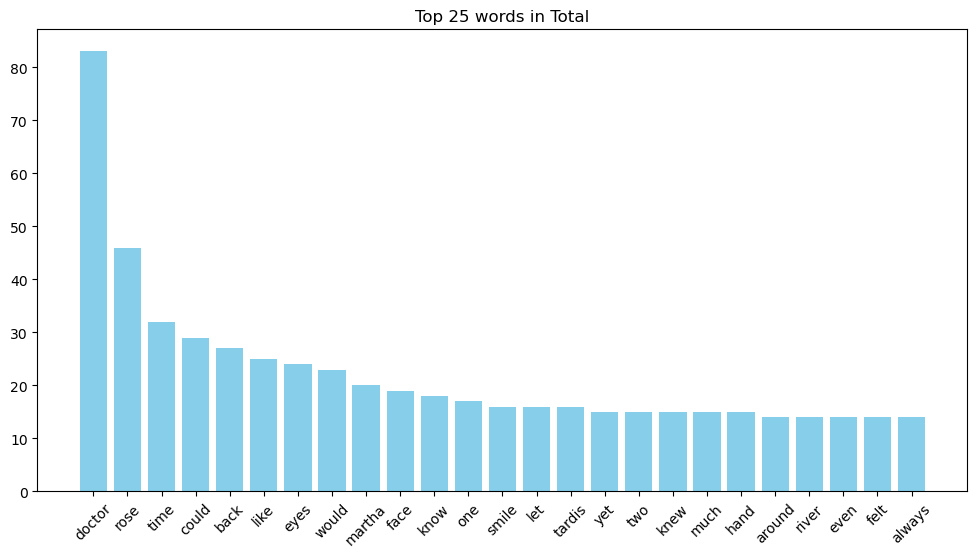

In [7]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')

# List of your text files
files = [f'{str(i).zfill(2)}.txt' for i in range(1, 6)]  # 01.txt, 02.txt, ..., 05.txt

# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Dictionaries to store results
sentences_dict = {}
words_dict = {}
freq_dict = {}

# Read and process each story
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    
    story_name = file  # Use filename as story identifier
    
    # Sentence splitting
    sentences = sent_tokenize(text)
    sentences_dict[story_name] = sentences
    
    # Word tokenization
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha() and w not in stop_words]
    words_dict[story_name] = words
    
    # Word frequency
    freq_dict[story_name] = Counter(words)

# Total frequency across all stories
total_freq = sum(freq_dict.values(), Counter())

# Print stats
for story, freq in freq_dict.items():
    print(f"\nTop 10 words in {story}:", freq.most_common(10))

print("\nTop 10 words in Total:", total_freq.most_common(10))

# Function to plot top 25 words
def plot_top_words(counter, title):
    top_words = counter.most_common(25)
    words, counts = zip(*top_words)
    plt.figure(figsize=(12,6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Plot per story
for story, freq in freq_dict.items():
    plot_top_words(freq, f"Top 25 words in {story}")

# Plot total
plot_top_words(total_freq, "Top 25 words in Total")


> Perform stemming on the text using Porter and Lancaster stemmer. Re-create the statistics and the plot from 1. Compare the differences between the stemmed and unstemmed results, and discuss the difference in the results of the two stemmers. 

Now I will explore the SpaCy-tool.

> In Brightspace, you will find three translations of Tom Sawyer by Mark Twain. After cleaning the document (removing the preamble, TOC, licensing information) use the appropriate spacy models to derrive the POS-tags of the text. What assumptions do you make based on these findings? 